In [1]:
!pip install -q qiskit
!pip install -q qiskit_aer
!pip install -q pylatexenc
!pip install -q qiskit_ibm_runtime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 91.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.9/363.9 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 6.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that a

In [19]:
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister,transpile
import matplotlib.pyplot as plt
import numpy as np
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Operator
from qiskit.visualization import plot_histogram

In [35]:
from qiskit.circuit.library import IGate,XGate,CXGate
#creating basic operators
I    = Operator(IGate())
X    = Operator(XGate())
CX_1 = Operator(CXGate(ctrl_state=1))
CX_0 = Operator(CXGate(ctrl_state=0))


In [36]:
#creating the oracles for different functions
U_list= []
U_list.append(Operator(I^I^I^I^I)) #constant function - f(x) = 0, doesn't change the ancilla for any input
U_list.append(Operator(CX_1^I^I^I)) #balanced function - f(x) = [x/8]
U_list.append(Operator(X^I^I^I^I)) #constant function - f(x) = 1, the ancilla is changed for all inputs
U_list.append(Operator(CX_0^I^I^I)) #balanced function - f(x) = [(15-x)/8]

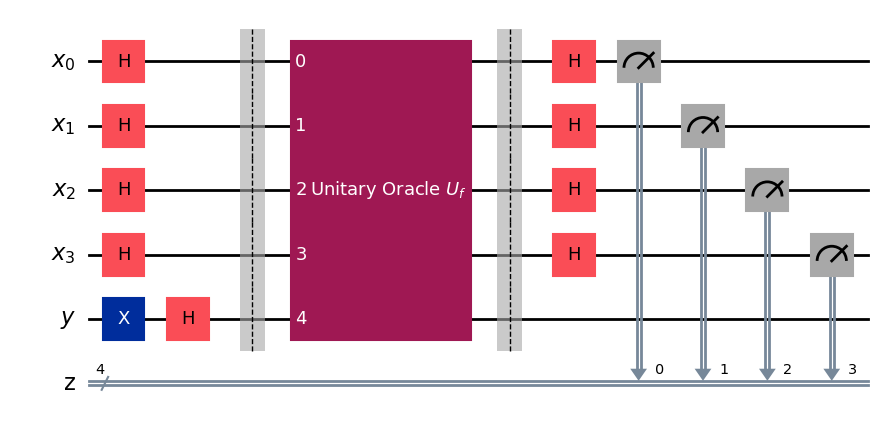

In [60]:
#creating the function to implement the Deutsch-Jozsa algorithm giving the operator as parameter
def circuit(U):
    x= QuantumRegister(4, "x")
    y= QuantumRegister(1, "y")
    z= ClassicalRegister(4, "z")
    circuit= QuantumCircuit(x, y, z)

    circuit.x(4)
    circuit.h(range(5)) #applying hadamard gate on all qubits
    circuit.barrier()

    U_f= U.to_instruction() #creating the unitary oracle gate which maps |x⟩|y⟩ to |x⟩|y ⊕ f(x)⟩.
    circuit.unitary(U_f, range(5), "Unitary Oracle $U_f$")
    circuit.barrier()

    circuit.h(range(0,4))
    circuit.measure(x, z)

    return circuit

display(circuit(Operator(I^I^I^I^I)).draw(output="mpl"))

In [69]:
#determining the nature of the functions by measuring the first 4 qubits.
outcomes= []
values = []

for U in U_list:
    result= AerSimulator().run(circuit(U), shots= 1).result()
    outcomes.append(list(result.get_counts().keys())[0])
    values.append(list(result.get_counts().values())[0])

for i in range(4):
    if outcomes[i] == "0000":
        print(f"Query {i+1}: The Function is constant")
    else:
        print(f"Query {i+1}: The Function is balanced")

print(f"The outcomes are {outcomes} with values {values}")

Query 1: The Function is constant
Query 2: The Function is balanced
Query 3: The Function is constant
Query 4: The Function is balanced
The outcomes are ['0000', '1000', '0000', '1000'] with values [1, 1, 1, 1]
